In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np
from skimage.io import imread, imsave
from a72_utilities import *

mpl.rcParams['figure.dpi'] = 100

In [3]:
native_leem_IV = imread("/Users/apple/Sync/Research/Alloy 72/20240614_Alloy_72_Native_Oxide brookhaven/3-5-25 Brookhaven trip as-loaded native /LEEM_IV_30um_2CA_-4eV_4eV_0p1eV-step/Native surface LEEM IV.tif")
sputtered_leem_IV = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Sputtered/LEEM_IV_30um_2CA_-4eV_4eV_0p1eV-step/sputtered LEEM IV.tif")
ox_5L_leem_IV = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Oxidized_5L_RT/LEEM_IV_30um_2CA_-4eV_4eV_0p1eV-step/oxidized 5L LEEM IV.tif")
ox_100L_leem_IV = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Oxidized_100L_RT/LEEM_IV_30um_2CA_-4eV_4eV_0p1eV-step/oxidized_100L_LEEM_IV.tif")
iv_curves = [native_leem_IV,sputtered_leem_IV, ox_5L_leem_IV, ox_100L_leem_IV]
iv_labels = ["Native","Sputtered", "Oxidized 5L", "Oxidized 100L"]

In [4]:
#plt.imshow(np.average(sputtered_leem_IV,axis=0))
gradient = np.gradient(sputtered_leem_IV,axis=0)
fermi_position = np.argmin(gradient,axis=0)


(-0.5, 1023.5, 1023.5, -0.5)

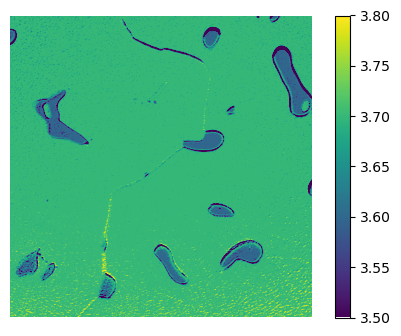

In [5]:
plt.imshow(fermi_position*0.1,vmin=3.5,vmax=3.8)
plt.colorbar()
plt.axis('off')

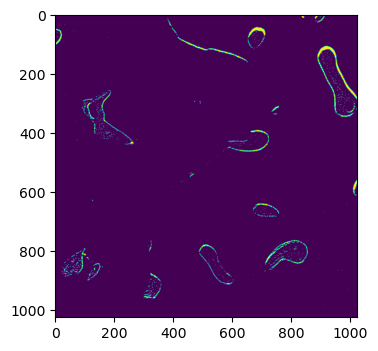

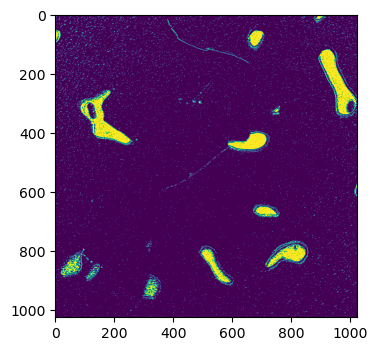

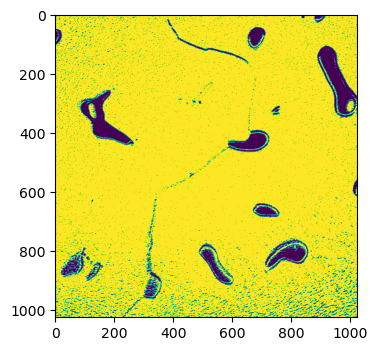

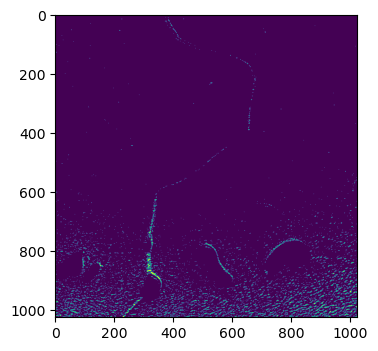

In [6]:
edges = (fermi_position<=35)
plt.imshow(edges)
plt.show()
plt.imshow(fermi_position==36)
plt.show()
plt.imshow(fermi_position==37)
plt.show()
plt.imshow(fermi_position>37)

33.49558941459503


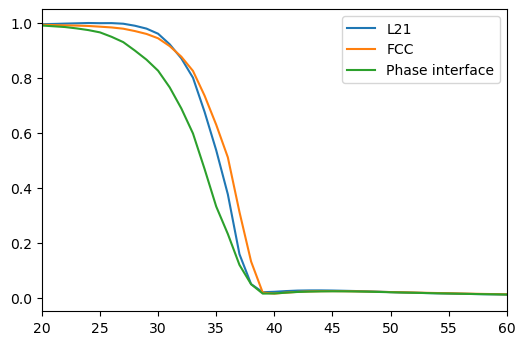

In [7]:
plt.plot(normalize_array(np.nanmean(sputtered_leem_IV*(fermi_position==36),axis=(1,2))),label='L21')
print(np.average(fermi_position[fermi_position<36]))
plt.plot(normalize_array(np.nanmean(sputtered_leem_IV*(fermi_position>=37),axis=(1,2))),label="FCC")
plt.plot(normalize_array(np.nanmean(sputtered_leem_IV*(fermi_position<36),axis=(1,2))),label="Phase interface")
plt.xlim(20,60)
plt.legend()


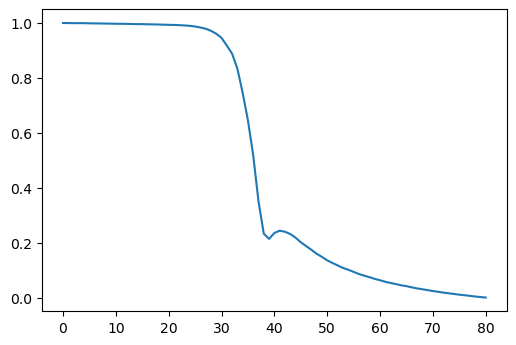

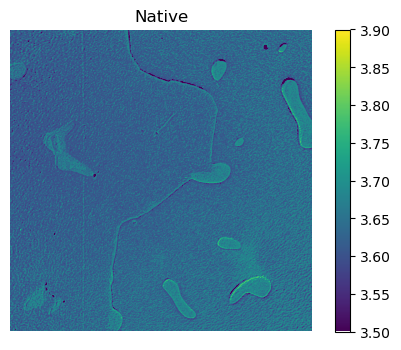

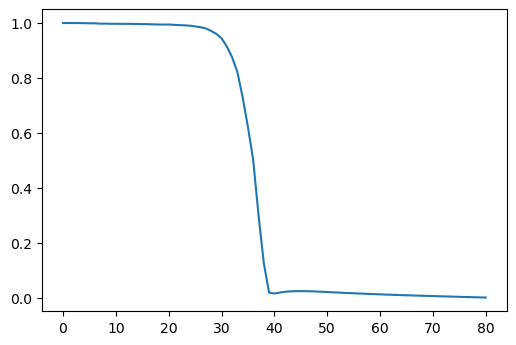

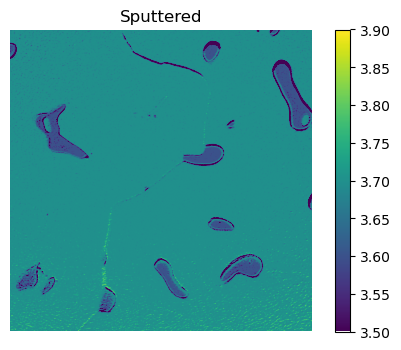

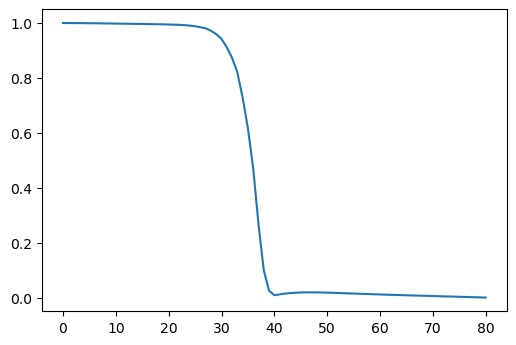

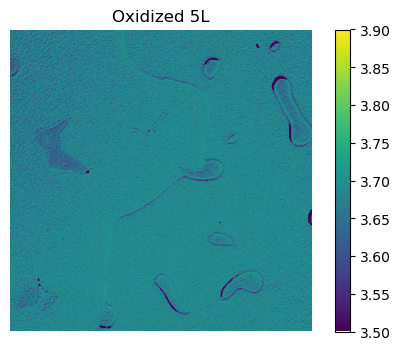

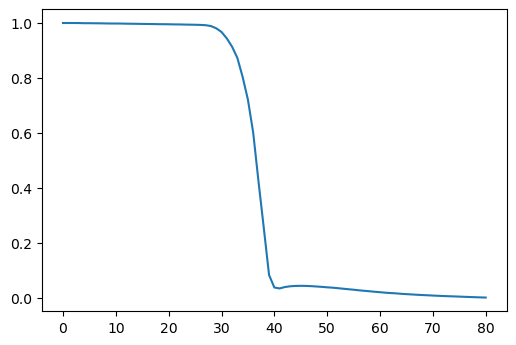

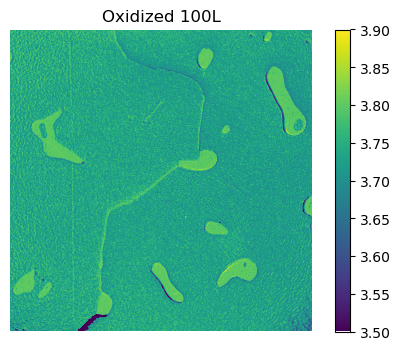

In [8]:
for i, iv_curve in enumerate(iv_curves):
    plt.plot(normalize_array(np.nanmean(iv_curve,axis=(1,2))),label=iv_labels[i])
    plt.show()
    gradient = np.gradient(iv_curve,axis=0)
    fermi_position = np.argmin(gradient,axis=0)
    plt.imshow(fermi_position*0.1,vmin=3.5,vmax=3.9)
    plt.colorbar()
    plt.axis('off')
    plt.title(iv_labels[i])
    plt.show()

